In [1]:
!pip install networkx

In [2]:

from pyspark.sql import SparkSession
from graphframes import GraphFrame
from pyspark.sql.functions import desc, asc
import matplotlib.pyplot as plt

import networkx as nx

In [3]:
# List of Maven coordinates for all required packages
maven_packages = [
    "graphframes:graphframes:0.8.4-spark3.5-s_2.12",
    "org.scala-lang:scala-library:2.12",
    "com.singlestore:singlestore-jdbc-client:1.2.4",
    "com.singlestore:singlestore-spark-connector_2.12:4.1.8-spark-3.5.0",
    "org.apache.commons:commons-dbcp2:2.12.0",
    "org.apache.commons:commons-pool2:2.12.0",
    "io.spray:spray-json_3:1.3.6"
]

# Create Spark session with all required packages
spark = (SparkSession
             .builder
             .config("spark.jars.packages", ",".join(maven_packages))
             .appName("Spark GraphFrames Test")
             .getOrCreate()
        )       

25/04/14 11:32:42 WARN Utils: Your hostname, MacBook-Pro-de-de.local resolves to a loopback address: 127.0.0.1; using 192.168.1.17 instead (on interface en0)
25/04/14 11:32:42 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Ivy Default Cache set to: /Users/derib/.ivy2/cache
The jars for the packages stored in: /Users/derib/.ivy2/jars
graphframes#graphframes added as a dependency
org.scala-lang#scala-library added as a dependency
com.singlestore#singlestore-jdbc-client added as a dependency
com.singlestore#singlestore-spark-connector_2.12 added as a dependency
org.apache.commons#commons-dbcp2 added as a dependency
org.apache.commons#commons-pool2 added as a dependency
io.spray#spray-json_3 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-b2a1a0b6-dbf2-4a81-8180-88ef0cf205d0;1.0
	confs: [default]
	found graphframes#graphframes;0.8.4-spark3.5-s_2.12 in spark-packages
	found org.slf4j#slf4j-api;1.7.16 in central
	found com.single

:: loading settings :: url = jar:file:/Users/derib/spark-3.5.5-bin-hadoop3/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


	found com.singlestore#singlestore-spark-connector_2.12;4.1.8-spark-3.5.0 in central
	found org.apache.avro#avro;1.11.3 in central
	found com.fasterxml.jackson.core#jackson-core;2.14.2 in central
	found com.fasterxml.jackson.core#jackson-databind;2.14.2 in central
	found com.fasterxml.jackson.core#jackson-annotations;2.14.2 in central
	found org.apache.commons#commons-compress;1.22 in central
	found org.slf4j#slf4j-api;1.7.36 in local-m2-cache
	found org.scala-lang.modules#scala-java8-compat_2.12;0.9.0 in central
	found io.spray#spray-json_2.12;1.3.5 in central
	found io.netty#netty-buffer;4.1.70.Final in central
	found io.netty#netty-common;4.1.70.Final in central
	found org.apache.commons#commons-dbcp2;2.12.0 in central
	found org.apache.commons#commons-pool2;2.12.0 in central
	found commons-logging#commons-logging;1.3.0 in central
	found jakarta.transaction#jakarta.transaction-api;1.3.3 in central
	found io.spray#spray-json_3;1.3.6 in central
	found org.scala-lang#scala3-library_3;3

In [4]:
#Loading the cora dataset
#cites files first column is source and second column is destination
schema = "src STRING, dst STRING"

In [5]:
df_cites = spark.read.format("csv").option("delimiter","\t").schema(schema).option("header",False).load("/Users/derib/data_architecture/tp_spark/cora/cora.cites")


In [6]:
df_cites.show(5)

+---+-------+
|src|    dst|
+---+-------+
| 35|   1033|
| 35| 103482|
| 35| 103515|
| 35|1050679|
| 35|1103960|
+---+-------+
only showing top 5 rows



In [7]:
def create_number_string(x, y, separator):
    """
    Create a string with numbers from x to y, adding a separator between the numbers.

    Args:
        x (int): Starting number.
        y (int): Ending number.
        separator (str): String to insert between numbers.

    Returns:
        str: The resulting string.
    """
    result = ""
    for i in range(x, y):
            if i == y-1:
                result = result + "w_" + str(i)+separator
            else:  
                 
                result = result + "w_" + str(i)+separator
                result = result+","
    return result

In [8]:
number = create_number_string(1, 1435, " STRING")
number = number + ",subject STRING"

In [9]:
df_content = spark.read.format("csv").option("delimiter","\t").schema(number).option("header",False).load("/Users/derib/data_architecture/tp_spark/cora/cora.content")


In [10]:
df_content.show(5)

25/04/14 11:32:45 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+---+---+---+---+---+---+---+---+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----

In [11]:
df_content.selectExpr("w_1 as id","subject").show()


+-------+--------------------+
|     id|             subject|
+-------+--------------------+
|  31336|     Neural_Networks|
|1061127|       Rule_Learning|
|1106406|Reinforcement_Lea...|
|  13195|Reinforcement_Lea...|
|  37879|Probabilistic_Met...|
|1126012|Probabilistic_Met...|
|1107140|              Theory|
|1102850|     Neural_Networks|
|  31349|     Neural_Networks|
|1106418|              Theory|
|1123188|     Neural_Networks|
|1128990|  Genetic_Algorithms|
| 109323|Probabilistic_Met...|
| 217139|          Case_Based|
|  31353|     Neural_Networks|
|  32083|     Neural_Networks|
|1126029|Reinforcement_Lea...|
|1118017|     Neural_Networks|
|  49482|     Neural_Networks|
| 753265|     Neural_Networks|
+-------+--------------------+
only showing top 20 rows



In [12]:
#create a relationships dataframe between the source and destination
df_edges = df_cites.selectExpr("src as src", "dst as dst")
df_edges.show(5)
#creating the vertices dataframe
df_vertices = df_content.selectExpr("w_1 as id","subject").distinct()
df_vertices.show(5)
#creating the graph frame   
g = GraphFrame(df_vertices, df_edges)

+---+-------+
|src|    dst|
+---+-------+
| 35|   1033|
| 35| 103482|
| 35| 103515|
| 35|1050679|
| 35|1103960|
+---+-------+
only showing top 5 rows

+-------+--------------------+
|     id|             subject|
+-------+--------------------+
|1139195|          Case_Based|
| 210872|  Genetic_Algorithms|
| 108983|Probabilistic_Met...|
|1110426|       Rule_Learning|
|  44455|  Genetic_Algorithms|
+-------+--------------------+
only showing top 5 rows



/Users/derib/data_architecture/.venv/lib/python3.13/site-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


In [13]:
motifs = g.find("(a)-[e]->(b)")
motifs.show()

/Users/derib/data_architecture/.venv/lib/python3.13/site-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+--------------------+-----------------+--------------------+
|                   a|                e|                   b|
+--------------------+-----------------+--------------------+
|{210872, Genetic_...| {210872, 606479}|{606479, Genetic_...|
|{210872, Genetic_...| {210872, 593260}|{593260, Genetic_...|
|{210872, Genetic_...|     {210872, 35}|{35, Genetic_Algo...|
|{210872, Genetic_...| {210872, 273152}|{273152, Genetic_...|
|{210872, Genetic_...| {210872, 210871}|{210871, Genetic_...|
|{210872, Genetic_...|{210872, 1129610}|{1129610, Genetic...|
|{108983, Probabil...| {108983, 683404}|{683404, Probabil...|
|{108983, Probabil...| {108983, 310653}|{310653, Probabil...|
|{108983, Probabil...| {108983, 159897}|{159897, Probabil...|
|{108983, Probabil...| {108983, 108962}|{108962, Probabil...|
|{44455, Genetic_A...|  {44455, 568857}|{568857, Genetic_...|
|{44455, Genetic_A...|   {44455, 41714}|{41714, Genetic_A...|
|{44455, Genetic_A...|  {44455, 387795}|{387795, Genetic_...|
|{44455,

In [14]:
vertices = g.vertices.count()
edges = g.edges.count()
print("Number of vertices: ", vertices)
print("Number of edges: ", edges)


Number of vertices:  2708
Number of edges:  5429


In [15]:
# Query: Get in-degree of each vertex => Number of incoming edges to a node
g.inDegrees.sort(desc("inDegree")).show()

+-------+--------+
|     id|inDegree|
+-------+--------+
|    434|       5|
|1152358|       5|
|1103315|       5|
|  95589|       5|
| 300071|       5|
|1131137|       5|
|  63832|       5|
| 976284|       5|
|  23258|       5|
|1109581|       5|
|   6125|       5|
|  65653|       5|
|1123188|       5|
|1126044|       5|
|  33818|       5|
| 110164|       5|
|1116347|       5|
| 141171|       5|
|1120563|       5|
|  13960|       5|
+-------+--------+
only showing top 20 rows



In [16]:
# Query: Get outDegree of each vertex => Number of outcoming edges from a node
g.outDegrees.sort(desc("outDegree")).show()

+-----+---------+
|   id|outDegree|
+-----+---------+
|   35|      166|
| 6213|       76|
| 1365|       74|
| 3229|       61|
|  114|       42|
|  910|       41|
| 4330|       38|
| 4584|       32|
| 1272|       32|
| 3231|       32|
|19621|       31|
| 2440|       30|
|24966|       29|
| 6214|       28|
| 2665|       28|
|  887|       27|
| 8224|       25|
|82920|       23|
|20193|       22|
|12182|       20|
+-----+---------+
only showing top 20 rows



In [25]:
sub_graph_most_cited_article = g.find("(a)-[e]->(b)").filter("a.id = '35'")
sub_graph_most_cited_article.show(truncate=False)


/Users/derib/data_architecture/.venv/lib/python3.13/site-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+------------------------+-------------+-----------------------------+
|a                       |e            |b                            |
+------------------------+-------------+-----------------------------+
|{35, Genetic_Algorithms}|{35, 1033}   |{1033, Genetic_Algorithms}   |
|{35, Genetic_Algorithms}|{35, 103482} |{103482, Neural_Networks}    |
|{35, Genetic_Algorithms}|{35, 103515} |{103515, Genetic_Algorithms} |
|{35, Genetic_Algorithms}|{35, 1050679}|{1050679, Genetic_Algorithms}|
|{35, Genetic_Algorithms}|{35, 1103960}|{1103960, Genetic_Algorithms}|
|{35, Genetic_Algorithms}|{35, 1103985}|{1103985, Genetic_Algorithms}|
|{35, Genetic_Algorithms}|{35, 1109199}|{1109199, Genetic_Algorithms}|
|{35, Genetic_Algorithms}|{35, 1112911}|{1112911, Genetic_Algorithms}|
|{35, Genetic_Algorithms}|{35, 1113438}|{1113438, Genetic_Algorithms}|
|{35, Genetic_Algorithms}|{35, 1113831}|{1113831, Genetic_Algorithms}|
|{35, Genetic_Algorithms}|{35, 1114331}|{1114331, Genetic_Algorithms}|
|{35, 

In [18]:
def PlotGraph(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('a','b').take(20):
        Gplot.add_edge(row['a'].id,row['b'].id)

    plt.subplot(111)
    nx.draw(Gplot, with_labels=True)

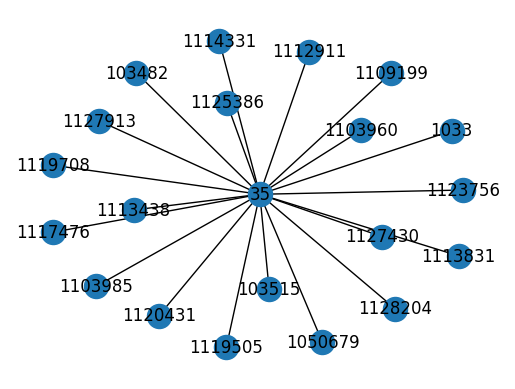

In [19]:
PlotGraph(sub_graph_most_cited_article)
plt.show()

In [30]:
communities = g.labelPropagation(maxIter=5)


/Users/derib/data_architecture/.venv/lib/python3.13/site-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


In [31]:
communities.persist().show(10)


+-------+--------------------+-------------+
|     id|             subject|        label|
+-------+--------------------+-------------+
|1139195|          Case_Based|1657857376262|
| 210872|  Genetic_Algorithms|  42949672964|
| 108983|Probabilistic_Met...|1228360646661|
|1110426|       Rule_Learning| 377957122062|
|  44455|  Genetic_Algorithms|1709396983818|
|  40922|          Case_Based| 790273982471|
| 265203|  Genetic_Algorithms| 429496729619|
|  96851|  Genetic_Algorithms| 987842478085|
|  66596|       Rule_Learning|1185410973706|
| 192734|              Theory| 429496729619|
+-------+--------------------+-------------+
only showing top 10 rows



In [33]:
print (f"There are {communities.select('label').distinct().count()} communities in the graph.")

There are 642 communities in the graph.


In [23]:
results = g.pageRank(resetProbability=0.01, maxIter=20)
results.vertices.select("id", "pagerank").sort(desc("pagerank")).show()

/Users/derib/data_architecture/.venv/lib/python3.13/site-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")
/Users/derib/data_architecture/.venv/lib/python3.13/site-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


+------+------------------+
|    id|          pagerank|
+------+------------------+
|683404|  82.1370509949677|
|683355| 77.69045019041005|
|102879| 55.51335811903331|
|578347| 53.54517444484169|
|289085| 50.58292216839493|
| 95719| 49.60644358341024|
| 39210| 49.12522307157263|
|578309|  49.1242859072988|
|593328| 48.81550404691081|
| 32698|46.474289506294134|
|689152|46.061849363691245|
|399370|41.754069471677894|
| 60159| 41.48002521952517|
|206371|40.567918037437245|
| 87363| 38.50947906853315|
|431206| 36.87055455084952|
|249858|  36.0904785451569|
|111866| 35.66275693852059|
| 69296|33.874160050616894|
|592986| 32.23348321733851|
+------+------------------+
only showing top 20 rows



In [56]:
# Display resulting pageranks and final edge weights
# Note that the displayed pagerank may be truncated, e.g., missing the E notation
# In Spark 1.5+, you can use show(truncate=False) to avoid truncation
results.vertices.select("id", "pagerank").show()
results.edges.select("src", "dst","weight").show()

+-------+-------------------+
|     id|           pagerank|
+-------+-------------------+
|1139195|0.32815732683752336|
| 210872|0.16551869677050218|
| 108983|  0.207938748388509|
|1110426|0.24373685622204663|
|  44455|0.18326475604108672|
|  40922|0.17576746070023486|
| 265203|0.17595630814737617|
|  96851|0.16551869677050218|
|  66596|0.16551869677050218|
|  28485| 0.1869183029217508|
| 642847|0.19282928173763503|
| 325314|0.16551869677050218|
|   4804| 0.2807187506997389|
|  33301|0.16551869677050218|
|1135368|0.16773306852459405|
| 568857|0.30786975988429427|
|1102873|0.25931811187062315|
|   8832|0.17576746070023486|
|1115471| 0.3570455497525141|
|1106789|0.26336712391577255|
+-------+-------------------+
only showing top 20 rows

+------+-------+--------------------+
|   src|    dst|              weight|
+------+-------+--------------------+
|  5348|1108050| 0.06666666666666667|
|  1365|1108050|0.013513513513513514|
|  2696|1108050|0.058823529411764705|
|    35|1133196|0.00602409

In [42]:
page_rank_high = g.find("(a)-[e]->(b); (b)-[e2]->(c)").filter("b.id = '683404'").filter("a.id != b.id and c.id != b.id and a.id != c.id")
page_rank_high.show(truncate=False)

/Users/derib/data_architecture/.venv/lib/python3.13/site-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+-------------------------------+----------------+-------------------------------+----------------+-------------------------------+
|a                              |e               |b                              |e2              |c                              |
+-------------------------------+----------------+-------------------------------+----------------+-------------------------------+
|{108983, Probabilistic_Methods}|{108983, 683404}|{683404, Probabilistic_Methods}|{683404, 683355}|{683355, Probabilistic_Methods}|
|{683360, Probabilistic_Methods}|{683360, 683404}|{683404, Probabilistic_Methods}|{683404, 683355}|{683355, Probabilistic_Methods}|
|{189856, Probabilistic_Methods}|{189856, 683404}|{683404, Probabilistic_Methods}|{683404, 683355}|{683355, Probabilistic_Methods}|
+-------------------------------+----------------+-------------------------------+----------------+-------------------------------+



In [ ]:
#Computes the number of triangles passing through each vertex.
results = g.triangleCount()
results.select("id", "count").sort(desc("count")).show()

+------+-----+
|    id|count|
+------+-----+
|    35|  160|
|  6213|   95|
|  6214|   33|
|  4584|   31|
|  2658|   31|
|  2665|   30|
| 12576|   30|
|  3231|   27|
|   887|   24|
|643221|   23|
|230879|   22|
| 82920|   20|
|  6910|   17|
|  2696|   17|
| 10169|   17|
|  1365|   17|
| 12350|   17|
|   114|   17|
|  3229|   17|
| 31353|   17|
+------+-----+
only showing top 20 rows



In [63]:
filtered_paths = g.bfs("id = '35'", "id = '6213'")
filtered_paths.show(truncate=False)
filtered_paths.count()

+------------------------+---------+-------------------------+-----------+------------------------------+
|from                    |e0       |v1                       |e1         |to                            |
+------------------------+---------+-------------------------+-----------+------------------------------+
|{35, Genetic_Algorithms}|{35, 887}|{887, Genetic_Algorithms}|{887, 6213}|{6213, Reinforcement_Learning}|
+------------------------+---------+-------------------------+-----------+------------------------------+



1

In [66]:
filtered_paths = g.bfs("id = '35'", "subject == 'Case_Based'")
filtered_paths.show(truncate=False)
filtered_paths.count()

+------------------------+-----------+-------------------+
|from                    |e0         |to                 |
+------------------------+-----------+-------------------+
|{35, Genetic_Algorithms}|{35, 1956} |{1956, Case_Based} |
|{35, Genetic_Algorithms}|{35, 81722}|{81722, Case_Based}|
+------------------------+-----------+-------------------+



2

In [65]:
filtered_paths = g.shortestPaths(['35', '6213'])
filtered_paths.show(truncate=False)
filtered_paths.count()

25/04/14 16:11:28 WARN BlockManager: Block rdd_2503_0 already exists on this machine; not re-adding it
/Users/derib/data_architecture/.venv/lib/python3.13/site-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+-------+----------------------+--------------------+
|id     |subject               |distances           |
+-------+----------------------+--------------------+
|1139195|Case_Based            |{}                  |
|210872 |Genetic_Algorithms    |{6213 -> 3, 35 -> 1}|
|108983 |Probabilistic_Methods |{}                  |
|1110426|Rule_Learning         |{}                  |
|44455  |Genetic_Algorithms    |{}                  |
|40922  |Case_Based            |{}                  |
|265203 |Genetic_Algorithms    |{}                  |
|96851  |Genetic_Algorithms    |{}                  |
|66596  |Rule_Learning         |{}                  |
|28485  |Reinforcement_Learning|{}                  |
|642847 |Probabilistic_Methods |{}                  |
|325314 |Neural_Networks       |{}                  |
|4804   |Theory                |{}                  |
|33301  |Case_Based            |{}                  |
|1135368|Neural_Networks       |{}                  |
|568857 |Genetic_Algorithms 

2708